<a href="https://colab.research.google.com/github/EmilDragola/4KyrsNeiroseti/blob/master/NeirosetiPrakticheskaya4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





169001437/169001437 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Размерность X_train: (40000, 32, 32, 3)
Размерность X_val: (10000, 32, 32, 3)
Размерность X_test: (10000, 32, 32, 3)
Размерность y_train: (40000, 100)
Размерность y_val: (10000, 100)
Размерность y_test: (10000, 100)


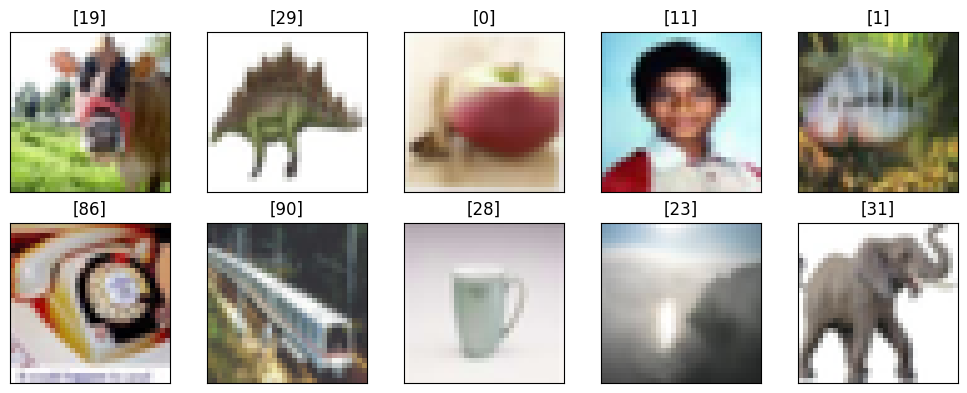

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Загружаем датасет
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Визуализируем несколько изображений из датасета
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
plt.tight_layout()

# Производим нормализацию данных
X_train = X_train / 255
X_test = X_test / 255


# Конвертируем метки классов в one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Разделяем данные на обучающую и проверочную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Проверяем размерности данных
print('Размерность X_train:', X_train.shape)
print('Размерность X_val:', X_val.shape)
print('Размерность X_test:', X_test.shape)
print('Размерность y_train:', y_train.shape)
print('Размерность y_val:', y_val.shape)
print('Размерность y_test:', y_test.shape)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

Обучите созданную модель

In [ ]:
model_1 = Sequential([
    # Сверточный слой с 32 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    # Сверточный слой с 32 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(32, (3,3), padding='same', activation='relu'),
    # Слой подвыборки с размером ядра 2х2
    MaxPooling2D(pool_size=(2,2)),
    # Сверточный слой с 64 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(64, (3,3), padding='same', activation='relu'),
    # Сверточный слой с 64 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(64, (3,3), padding='same', activation='relu'),
    # Слой подвыборки с размером ядра 2х2
    MaxPooling2D(pool_size=(2,2)),
    # Преобразование матрицы признаков в одномерный массив
    Flatten(),
    # Полносвязный слой с 512 нейронами и функцией активации ReLU
    Dense(512, activation='relu'),
    # Выходной полносвязный слой с числом нейронов, равным количеству классов и функцией активации softmax
    Dense(num_classes, activation='softmax')
])

# Компилируем модель с оптимизатором Adam, функцией потерь categorical_crossentropy и метрикой accuracy
model_1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
epochs = 10

history_1 = model_1.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epochs, 
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 14s 8ms/step - loss: 3.8068 - accuracy: 0.1203 - val_loss: 3.3208 - val_accuracy: 0.2101
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 2.9916 - accuracy: 0.2633 - val_loss: 2.8762 - val_accuracy: 0.2904
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 2.4873 - accuracy: 0.3652 - val_loss: 2.6493 - val_accuracy: 0.3441
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 2.0719 - accuracy: 0.4568 - val_loss: 2.5513 - val_accuracy: 0.3682
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 1.6766 - accuracy: 0.5466 - val_loss: 2.6538 - val_accuracy: 0.3703
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 1.2718 - accuracy: 0.6460 - val_loss: 2.8756 - val_accuracy: 0.3634
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.8710 - accuracy: 0.7456 - val_loss: 3.4823 - val_accuracy: 0.3519
Epoch

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

Обучите созданную модель

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model_2 = Sequential()

model_2.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epochs = 10

history_2 = model_2.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epochs, 
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 11s 9ms/step - loss: 3.3515 - accuracy: 0.2161 - val_loss: 3.0633 - val_accuracy: 0.2614
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 2.4310 - accuracy: 0.3794 - val_loss: 2.6175 - val_accuracy: 0.3528
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 1.9519 - accuracy: 0.4838 - val_loss: 2.4237 - val_accuracy: 0.3993
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 1.5508 - accuracy: 0.5769 - val_loss: 2.5575 - val_accuracy: 0.3953
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 1.1660 - accuracy: 0.6740 - val_loss: 2.7685 - val_accuracy: 0.3678
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.8077 - accuracy: 0.7711 - val_loss: 2.7919 - val_accuracy: 0.3958
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5049 - accuracy: 0.8597 - val_loss: 3.2745 - val_accuracy: 0.3689
Epoch

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

Обучите созданную модель

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_3.add(Conv2D(32, (3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3,3), activation='relu'))
model_3.add(Conv2D(64, (3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epochs = 10

history_3 = model_3.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epochs, 
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 7s 8ms/step - loss: 4.1542 - accuracy: 0.0645 - val_loss: 3.6523 - val_accuracy: 0.1435
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 3.5611 - accuracy: 0.1554 - val_loss: 3.2421 - val_accuracy: 0.2224
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 3.2514 - accuracy: 0.2090 - val_loss: 2.9956 - val_accuracy: 0.2712
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 3.0440 - accuracy: 0.2519 - val_loss: 2.8623 - val_accuracy: 0.2926
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 2.8896 - accuracy: 0.2764 - val_loss: 2.7569 - val_accuracy: 0.3136
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 2.7540 - accuracy: 0.3064 - val_loss: 2.6232 - val_accuracy: 0.3433
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 2.6426 - accuracy: 0.3284 - val_loss: 2.5370 - val_accuracy: 0.3583
Epoch 

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

Обучите созданную модель

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_4 = Sequential()

model_4.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, (3,3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3,3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3,3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(100, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epochs = 10

history_4 = model_4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 10s 11ms/step - loss: 4.1284 - accuracy: 0.1185 - val_loss: 3.3642 - val_accuracy: 0.2033
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 3.1501 - accuracy: 0.2414 - val_loss: 3.0412 - val_accuracy: 0.2646
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 2.7213 - accuracy: 0.3168 - val_loss: 2.7875 - val_accuracy: 0.2986
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 2.4856 - accuracy: 0.3608 - val_loss: 2.5084 - val_accuracy: 0.3538
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 2.3214 - accuracy: 0.3968 - val_loss: 2.2492 - val_accuracy: 0.4103
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 2.1902 - accuracy: 0.4261 - val_loss: 2.2093 - val_accuracy: 0.4265
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 2.0910 - accuracy: 0.4448 - val_loss: 2.1293 - val_accuracy: 0.4484
Ep

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

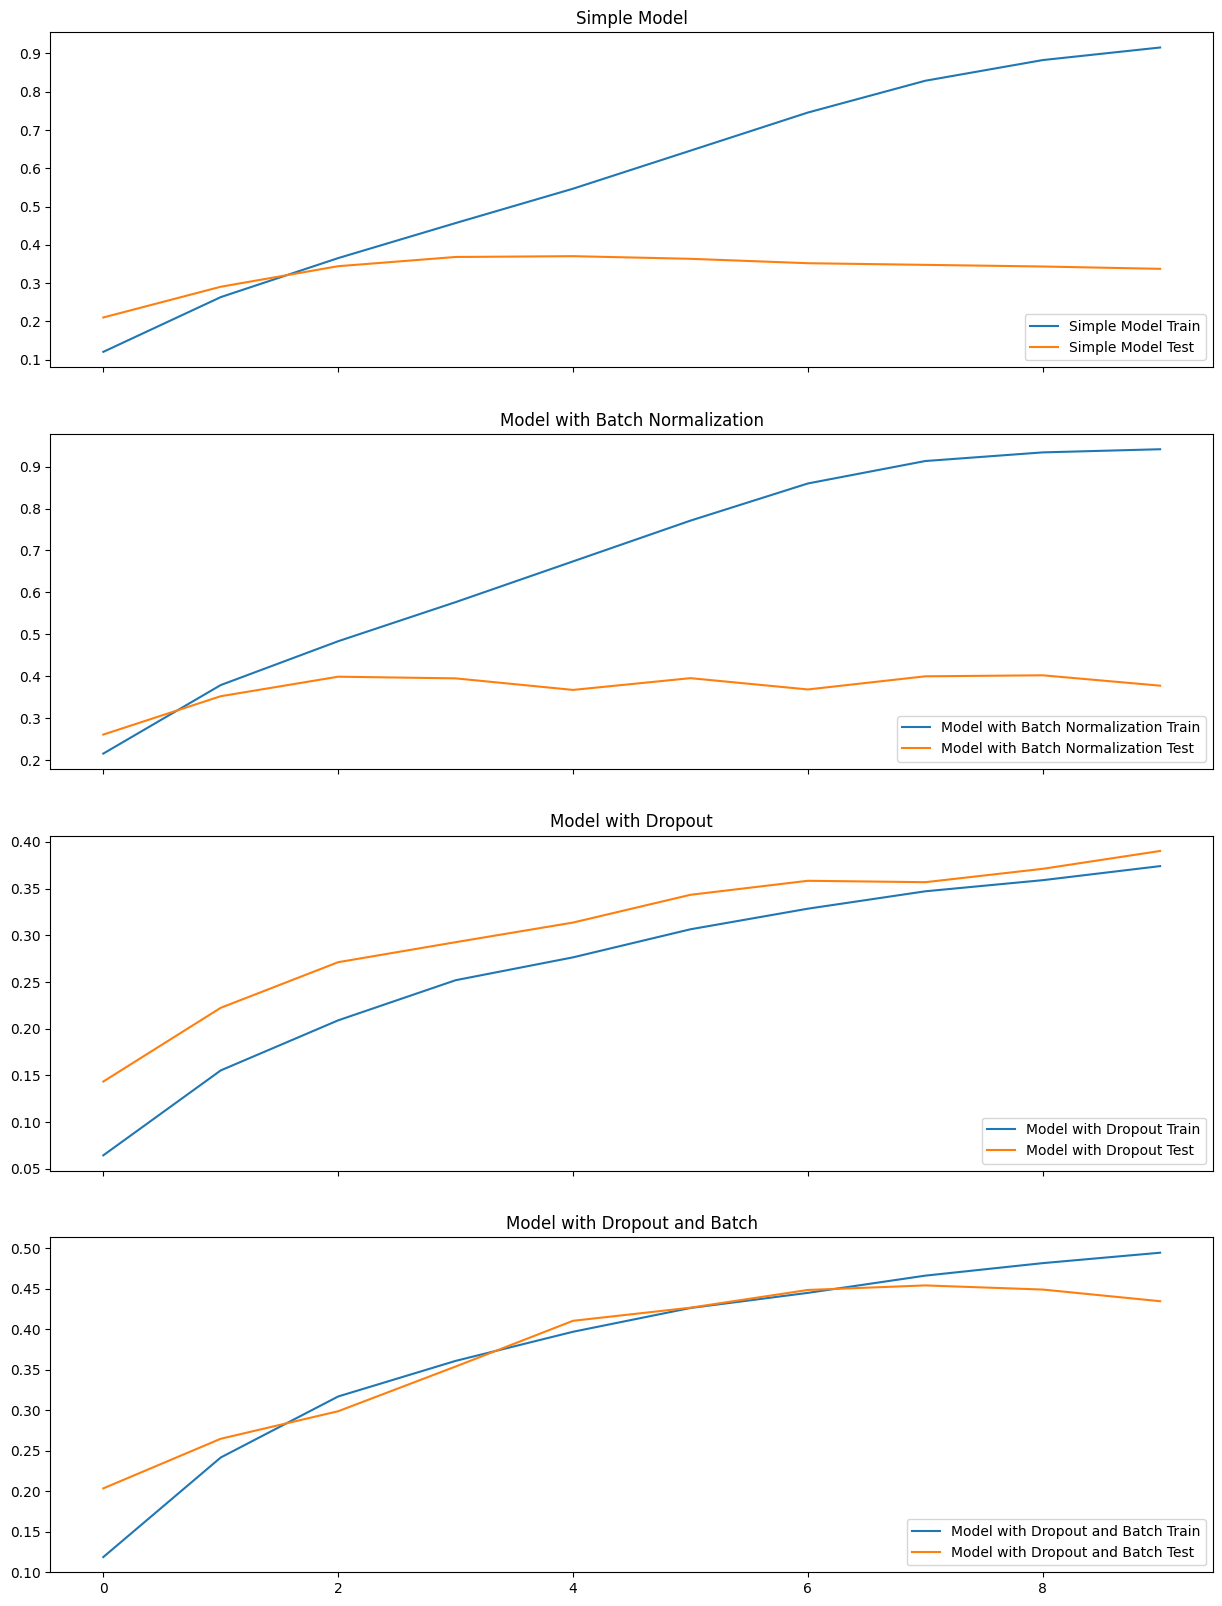

In [ ]:
import matplotlib.pyplot as plt

fig, (model1Plt, model2Plt, model3Plt, model4Plt) = plt.subplots(4, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(20)

model1Plt.set_title("Simple Model")
model1Plt.plot(history_1.history['accuracy'])
model1Plt.plot(history_1.history['val_accuracy'])
model1Plt.legend(['Simple Model Train', 'Simple Model Test'], loc="lower right")

model2Plt.set_title("Model with Batch Normalization")
model2Plt.plot(history_2.history['accuracy'])
model2Plt.plot(history_2.history['val_accuracy'])
model2Plt.legend(['Model with Batch Normalization Train', 'Model with Batch Normalization Test'], loc="lower right")

model3Plt.set_title("Model with Dropout")
model3Plt.plot(history_3.history['accuracy'])
model3Plt.plot(history_3.history['val_accuracy'])
model3Plt.legend(['Model with Dropout Train', 'Model with Dropout Test'], loc="lower right")

model4Plt.set_title("Model with Dropout and Batch")
model4Plt.plot(history_4.history['accuracy'])
model4Plt.plot(history_4.history['val_accuracy'])
_ = model4Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")

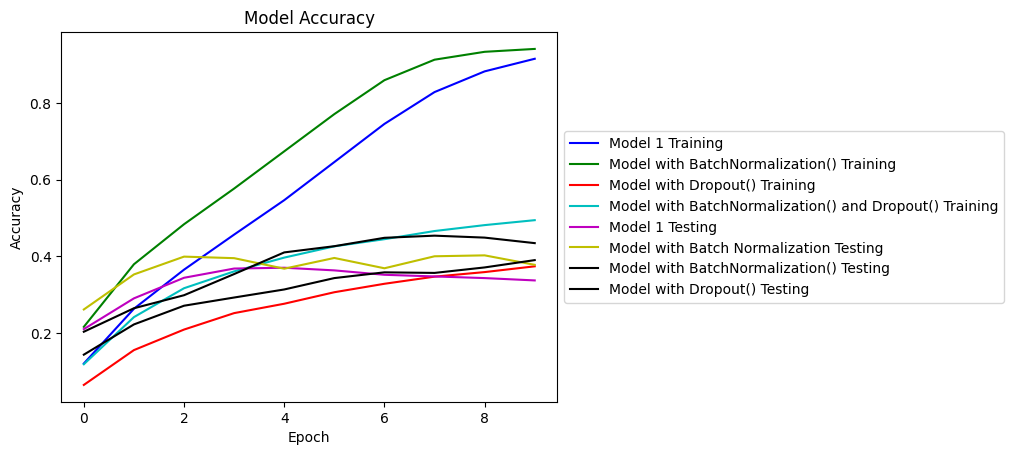

In [ ]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.plot(history_1.history['accuracy'], color= colors[0])
plt.plot(history_2.history['accuracy'], color= colors[1])
plt.plot(history_3.history['accuracy'], color= colors[2])
plt.plot(history_4.history['accuracy'], color= colors[3])
plt.plot(history_1.history['val_accuracy'], color= colors[4])
plt.plot(history_2.history['val_accuracy'], color= colors[5])
plt.plot(history_3.history['val_accuracy'], color= colors[6])
plt.plot(history_4.history['val_accuracy'], color= colors[6])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training',
            'Model with BatchNormalization() Training', 
            'Model with Dropout() Training',
            'Model with BatchNormalization() and Dropout() Training',
            'Model 1 Testing', 
            'Model with Batch Normalization Testing',
            'Model with BatchNormalization() Testing', 
            'Model with Dropout() Testing',
            'Model with BatchNormalization() and Dropout() Testing'],
             loc='center left', bbox_to_anchor=(1, 0.5))

Ваши выводы

Ваш итог

Можно заметить, что все модели сходятся к точности около 0.7-0.8 на проверочном наборе данных. Однако, модели с использованием BatchNormalization и Dropout (model_2, model_3, model_4) сходятся быстрее к более высокой точности и имеют меньшее переобучение.

Модель model_4, использующая и BatchNormalization, и Dropout, имеет лучшие результаты на проверочном наборе данных, а также имеет наименьшее переобучение.

Таким образом, можно сделать вывод, что модель model_4 является наиболее удачной для данной задачи классификации изображений CIFAR-100.